In [30]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

In [54]:
def contrast_RGB(image, alpha, beta):

    max_val = image.flatten().max()

    img = image.copy()

    alpha1 = alpha[0]
    alpha2 = alpha[1]

    beta1 = beta[0]
    beta2 = beta[1]

    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    rn = np.zeros_like(r)
    gn = np.zeros_like(g)
    bn = np.zeros_like(b)
    
    img_bit_mask_1_r = r < alpha1
    img_bit_mask_1_g = g < alpha1
    img_bit_mask_1_b = b < alpha1

    img_bit_mask_2_r = (alpha1 <= r) & (r <= alpha2)
    img_bit_mask_2_g = (alpha1 <= g) & (g <= alpha2)
    img_bit_mask_2_b = (alpha1 <= b) & (b <= alpha2)

    img_bit_mask_3_r = alpha2 < r
    img_bit_mask_3_g = alpha2 < g
    img_bit_mask_3_b = alpha2 < b

    s1 = (beta1 / alpha1)
    b1 = beta1 - alpha1 * s1
    s2 = ((beta2 - beta1) / (alpha2 - alpha1))
    b2 = beta2 - alpha2 * s2
    s3 = ((max_val - beta2) / (max_val - alpha2))
    b3 = max_val - max_val * s3

    # case R
    rn[img_bit_mask_1_r] = img[:,:,0][img_bit_mask_1_r] * s1 + b1
    gn[img_bit_mask_1_g] = img[:,:,1][img_bit_mask_1_g] * s1 + b1
    bn[img_bit_mask_1_b] = img[:,:,2][img_bit_mask_1_b] * s1 + b1
    
    # case G
    rn[img_bit_mask_2_r] = img[:,:,0][img_bit_mask_2_r] * s2 + b2
    gn[img_bit_mask_2_g] = img[:,:,1][img_bit_mask_2_g] * s2 + b2
    bn[img_bit_mask_2_b] = img[:,:,2][img_bit_mask_2_b] * s2 + b2
    
    # case B
    rn[img_bit_mask_3_r] = img[:,:,0][img_bit_mask_3_r] * s3 + b3
    gn[img_bit_mask_3_g] = img[:,:,1][img_bit_mask_3_g] * s3 + b3
    bn[img_bit_mask_3_b] = img[:,:,2][img_bit_mask_3_b] * s3 + b3

    return np.stack([rn, gn, bn], axis=2)
    
def read_img(img_path):
    return imageio.v3.imread(img_path)


In [55]:
def create_histogram_rgb(img=None):        
    fig, axs = plt.subplots(1, 4)
    fig.suptitle('RGB Histogram and corresponding image')
    fig.set_size_inches(18.5, 5.5)

    color = ('red','green','blue')        

    cdfs = np.empty(shape=(3,256))    
    hists = []
    tot_max_cdf = 0

    for i,col in enumerate(color):
        hist,_ = np.histogram(img[:,:,i].flatten(),256,[0,256])
        cdf = hist.cumsum()
        hists.append(hist)        
        cdfs[i] = cdf               
        if(cdf.max() > tot_max_cdf):
            tot_max_cdf = cdf.max()    

    for i,col in enumerate(color):        
        cdf_normalized = cdfs[i] * float(hists[i].max()) / np.max(cdfs.flatten())                     
        axs[i].plot(cdf_normalized, color = 'orange')
        axs[i].hist(img[:,:,i].ravel(),256,[0,256], color = col)        

    axs[0].legend(('cdf','histogram'), loc = 'upper left')  
    axs[1].legend(('cdf','histogram'), loc = 'upper left')  
    axs[2].legend(('cdf','histogram'), loc = 'upper left')  
    axs[3].imshow(img)

    plt.plot()
    plt.show()

Image Shape:  (330, 330, 3)


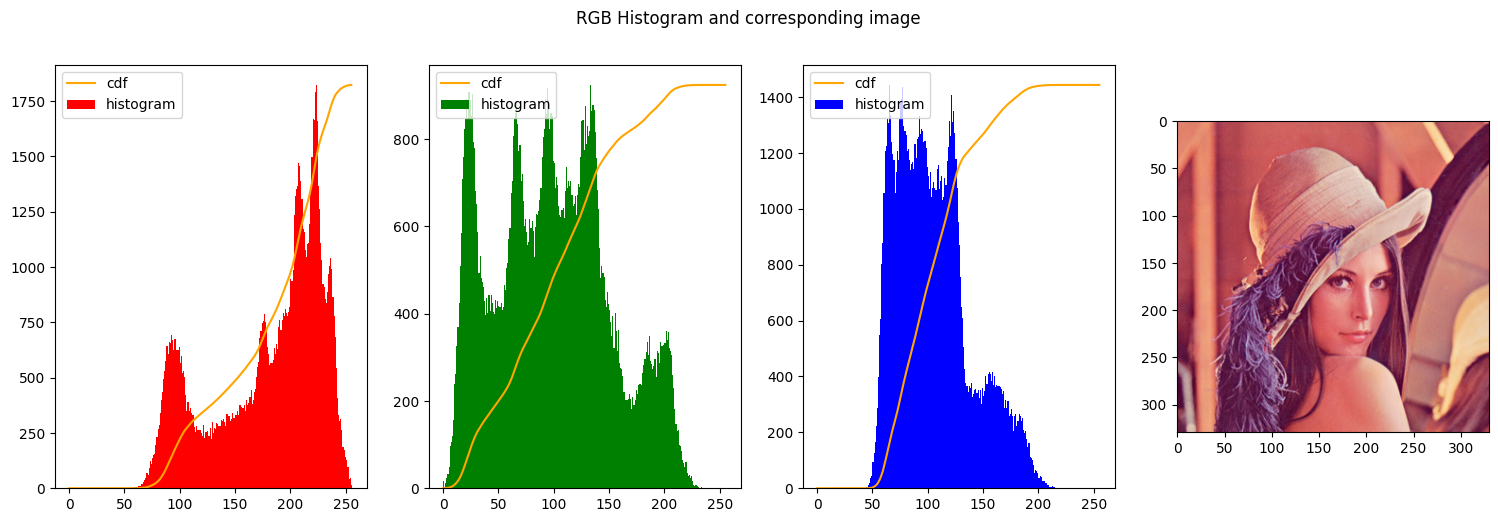

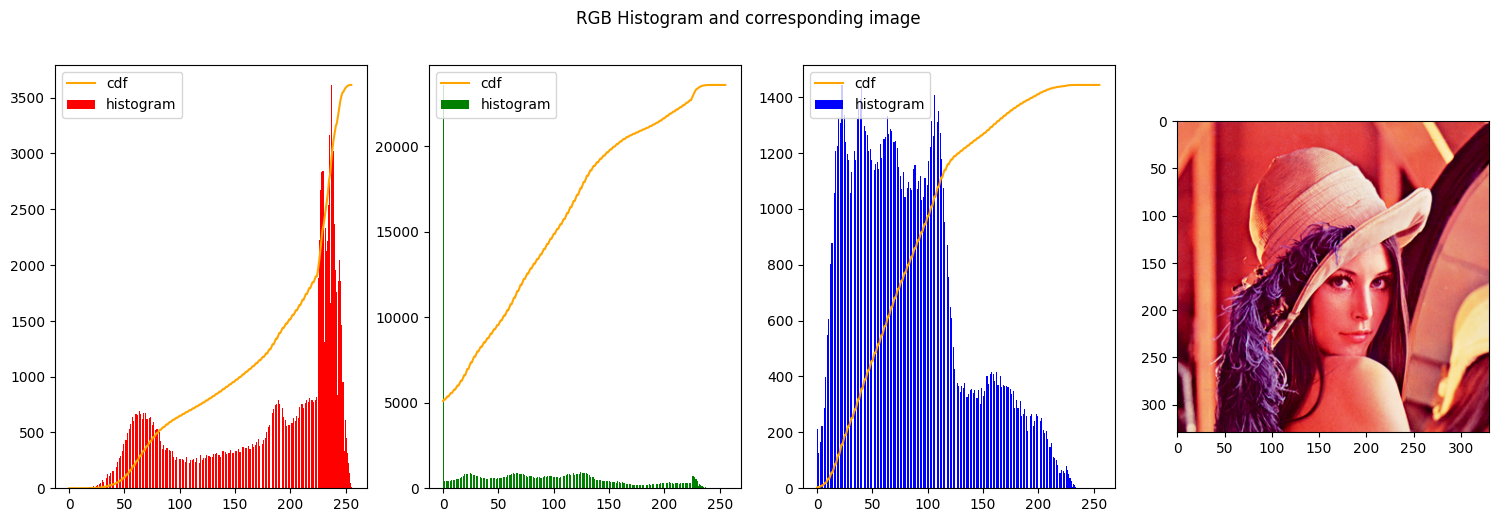

In [58]:
#img_path = "../../../images/used_images/light_dark/"
#img_name = "DSC_0015.jpg"

img_path = "./"
img_name = "lenna.png"

img_rgb = read_img(img_path + img_name)
print("Image Shape: ", img_rgb.shape)

create_histogram_rgb(img_rgb)

img_stretched = contrast_RGB(img_rgb, [50, 200], [0, 225])

create_histogram_rgb(img_stretched)
